In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics

In [27]:
ds = pd.read_csv("SMSSpamCollection", delimiter="\t", names=["label", "mail"] )
ds


,label,mail
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [28]:
ds.head()

,label,mail
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [29]:
ds['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [30]:
ds.isnull().sum()

label    0
mail     0
dtype: int64

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
import re

In [32]:

X = ds['mail'];
y = ds['label'];
y

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: label, Length: 5572, dtype: object

In [33]:
def remove_punct(X):
    for i in range(0, len(X)):
        X[i] = re.sub('[^a-zA-Z]', ' ', X[i])
        X[i] = X[i].lower()
    return X

In [34]:
X = remove_punct(X)


In [35]:
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(X)

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [38]:
y = le.fit_transform(y)
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [55]:
y_test.shape[0]

1393

In [13]:
model = MultinomialNB()

model.fit(X_train, y_train)

MultinomialNB()

In [14]:
y_preds = model.predict(X_test)
y_preds

array([1, 0, 0, ..., 1, 1, 0])

In [56]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score 
from sklearn.metrics import classification_report

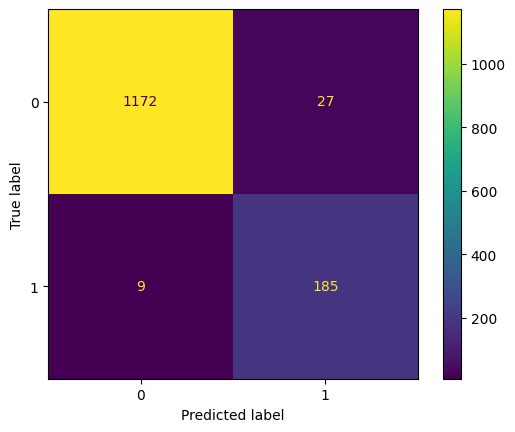

In [59]:
ConfusionMatrixDisplay.from_predictions(y_test, y_preds)


In [60]:
print(classification_report(y_test, y_preds))


              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1199
           1       0.87      0.95      0.91       194

    accuracy                           0.97      1393
   macro avg       0.93      0.97      0.95      1393
weighted avg       0.98      0.97      0.97      1393



In [61]:
acc = accuracy_score(y_test, y_preds)
acc

0.9741564967695621

In [62]:
metrics.precision_score(y_test, y_preds)

0.8726415094339622

In [63]:
metrics.f1_score(y_test, y_preds)

0.9113300492610837

In [21]:
mail = input("Enter a mail: ")

Enter a mail:  Free Entry!!


In [22]:
def predict(user_message, model, vectorizer):
    user_message = re.sub('^[a-zA-Z]', ' ', user_message)
    user_message = user_message.lower()
    user_message = [user_message]
    message = vectorizer.transform(user_message)
    pred = model.predict(message)
    if pred == 0:
        return "Ham"
    else:
        return"Spam"

In [23]:
user_message = mail
print(predict(user_message, model, vectorizer))

Spam
